#Objetivo del proyecto

### ¿En qué años Netflix produjo más contenido?

### ¿Se enfocaron más en películas o en series?

### ¿Cuál es la duración típica de películas en Netflix?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#df = pd.read_csv("/content/drive/MyDrive/Platzi/Proyecto 2/netflix_titles.csv")
df = pd.read_csv('/content/netflix_titles.csv')


In [3]:
#Mirar las primeras 5 filas

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
# FILTRAR
df_00s = df[df['release_year'] >= 2000]

# AGRUPAR Y CONTAR
conteo_per_year = df_00s.groupby('release_year').size()
##El año en que Netflix produjo mas contenido fue en 2018 con 1147 peliculas

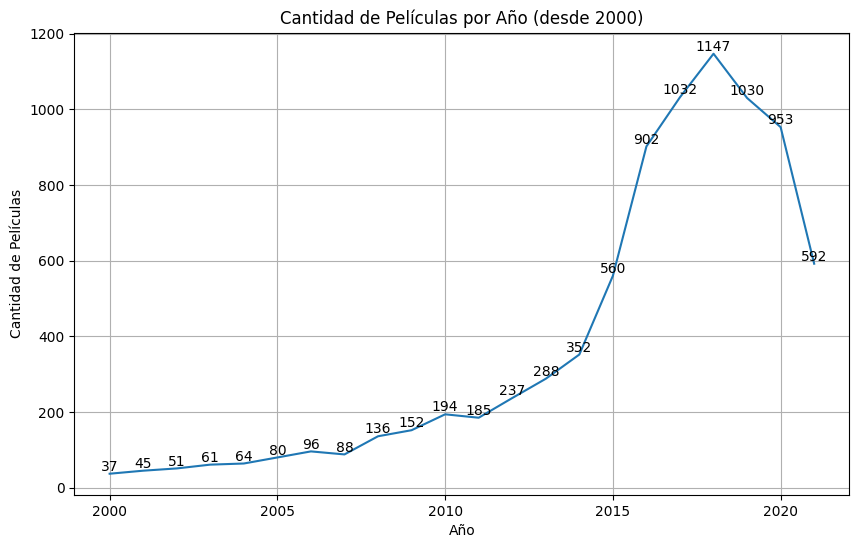

In [43]:
# PLOT
conteo_per_year.plot(kind='line', figsize=(10,6))
plt.title('Cantidad de Películas por Año (desde 2000)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(True)

# OPCIONAL: Poner numeritos encima
for x, y in conteo_per_year.items():
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()


In [4]:
#Estructura del archivo

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#Conteo de filas nulas por columna

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#¿Se enfocaron más en películas o en series?

In [12]:
peliculas = df[df['type'] == "Movie"]
series = df[df['type'] == "TV Show"]
conteo = df['type'].value_counts()

porcentaje_peliculas = (len(peliculas) / len(df)) * 100
porcentaje_series = (len(series) / len(df)) * 100

conteo

,count
type,
Movie,6131
TV Show,2676


In [13]:
porcentaje_peliculas, porcentaje_series

#Se enfocaron mas en peliculas, mas del 69% de su contenido son peliculas y alrededor del 30% son series

(69.61507891449983, 30.38492108550017)

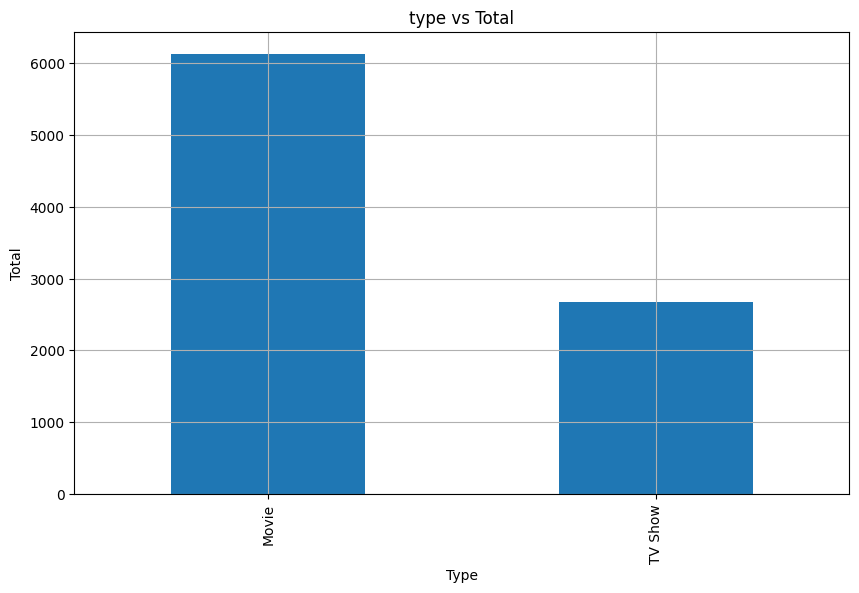

In [5]:
conteo.plot(kind='bar', figsize=(10,6))
plt.title('type vs Total')
plt.xlabel('Type')
plt.ylabel('Total')
plt.grid(True)

plt.show()

#¿Cuál es la duración típica de películas en Netflix?

In [24]:
df = df[df['duration'].notna()]

In [30]:
df_movie = df[df['type'] == "Movie"]
duracion = df_movie.groupby('duration').size()
df_movie.loc[:, 'duration'] = df_movie['duration'].str.replace(' min', '').astype(int)
media = df_movie['duration'].mean()
moda = df_movie['duration'].mode()[0]
media, moda
#print("La duracion ")


(np.float64(99.57718668407311), 90)

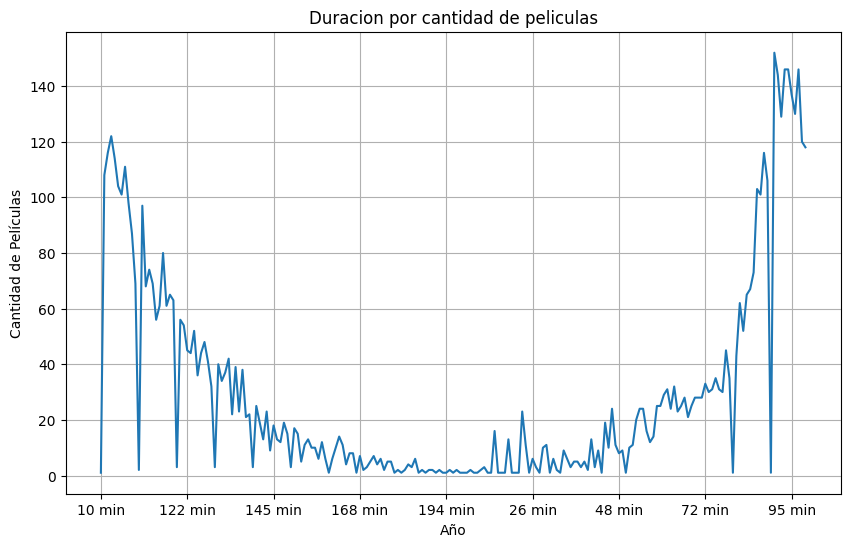

In [32]:
# PLOT
duracion.plot(kind='line', figsize=(10,6))
plt.title('Duracion por cantidad de peliculas')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(True)
plt.show()